In [33]:
from time import time
import matplotlib.pyplot as plt

In [2]:
def timeit(f):
    def timed(*args, **kw):

        ts = time()
        result = f(*args, **kw)
        te = time()

        elapsed = (te-ts)
        return result, elapsed

    return timed

# Primes

## Sieves
**Eratosthenes Sieve**
- A number N is prime, if all primes less than N do not divide evenly into N
 
**Pf by Contradiction**
- Assume there is a number less than N which divides N and is not prime. Call said number c. By definition c would be composite and therefore could be expressed as some combination of the other primes. Contradiction.

In [22]:
@timeit
def eratosthenes_sieve(n):
    """ find all primes less than n """
    known_primes = set()
    for i in range(2, n+1):
        if eratosthenes_primality(known_primes, i):
            known_primes.add(i)
    known_primes.add(1)
    return known_primes
            
def eratosthenes_primality(known_primes, i):
    return all(i % p != 0 for p in known_primes)

In [24]:
primes, runtime = eratosthenes_sieve(100)

### Erathoneses Sieve v2

In [26]:
import numpy as np

In [27]:
def find_multiples(n, C):
    """ find all multuples of a number n which are less than C """
    return [i*n-1 for i in range(1, C//n +1)]

In [28]:
@timeit
def erathoneses_sieve_v2(N):
    l = np.array([True] * N)
    primes = set([1])
    for val in range(2, N+1):
        if l[val-1]:
            multiples = find_multiples(val, N)
            l[multiples] = False
            primes.add(val)
            
    return primes

### Comparing Sieves

In [32]:
runtime_1 = []
runtime_2 = []
for N in range(100, 10000, 100):
    primes, runtime = eratosthenes_sieve(N)
    runtime_1.append((N, runtime))
    primes, runtime = erathoneses_sieve_v2(N)
    runtime_2.append((N, runtime))

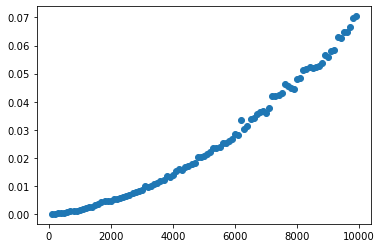

In [34]:
x, y = zip(*runtime_1)
plt.scatter(x=x, y=y)

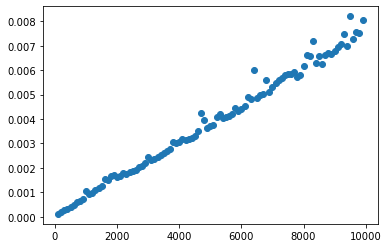

In [35]:
x, y = zip(*runtime_2)
plt.scatter(x=x, y=y)

## Prime Factors

In [ ]:
def prime_factors(n):
    """ find all prime factors of a number n"""
    known_primes = set()
    prime_factors = set()
    for i in range(2, n+1):
        if n in known_primes or n == 1.: 
            break
        if euclid_primality(known_primes, i):
            known_primes.add(i)
            if n % i == 0:
                n = n / i
                prime_factors.add(i)
                
    return prime_factors

In [ ]:
prime_factors(42)

### Prime Factorization

In [ ]:
def prime_factorization(n):
    if n == 1: return [1]
    known_primes = set()
    prime_factors = []
    for i in range(2, n+1):
        # if we have reduced our original number to 1
        # we exit, factorization complete
        if n == 1.: 
            break
        
        # if n is prime
        if euclid_primality(known_primes, i):
            known_primes.add(i)
            while n % i == 0:
                n = n / i
                prime_factors.append(i)
                
    return prime_factors

def eratosthenes_primality(known_primes, i):
    return all(i % p != 0 for p in known_primes)